In [7]:
from models.diffusion import Model
from main import dict2namespace
import numpy as np
import yaml
import torch 
import matplotlib.pyplot as plt

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("mps" if torch.backends.mps.is_available() else "cpu")
torch.manual_seed(0)


In [8]:
device

device(type='mps')

In [9]:
config = yaml.safe_load(open("configs/celeba.yml", "r"))
config = dict2namespace(config)
model = Model(config)

In [12]:
state_dict = torch.load('ckpt.pth', map_location=device)[0]
# create new OrderedDict that does not contain `module.`
from collections import OrderedDict
new_state_dict = OrderedDict()
for k, v in state_dict.items():
    name = k[7:] # remove `module.`
    new_state_dict[name] = v
# load params
model.load_state_dict(new_state_dict)
model.to(device)

Model(
  (temb): Module(
    (dense): ModuleList(
      (0): Linear(in_features=128, out_features=512, bias=True)
      (1): Linear(in_features=512, out_features=512, bias=True)
    )
  )
  (conv_in): Conv2d(3, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (down): ModuleList(
    (0): Module(
      (block): ModuleList(
        (0-1): 2 x ResnetBlock(
          (norm1): GroupNorm(32, 128, eps=1e-06, affine=True)
          (conv1): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (temb_proj): Linear(in_features=512, out_features=128, bias=True)
          (norm2): GroupNorm(32, 128, eps=1e-06, affine=True)
          (dropout): Dropout(p=0.1, inplace=False)
          (conv2): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
        )
      )
      (attn): ModuleList()
      (downsample): Downsample(
        (conv): Conv2d(128, 128, kernel_size=(3, 3), stride=(2, 2))
      )
    )
    (1): Module(
      (block): ModuleList(
       

In [13]:
model.eval()
print("Model loaded")

Model loaded


In [14]:
n = 50
x = torch.randn(
                    n,
                    config.data.channels,
                    config.data.image_size,
                    config.data.image_size,
                    #device=device,
                )

In [15]:
torch.no_grad()

a, b = model(x.to(device), torch.ones(n).to(device))
#a.shape

In [16]:
print(a.shape)
print(b.shape)

torch.Size([50, 3, 64, 64])
torch.Size([50, 512, 4, 4])


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


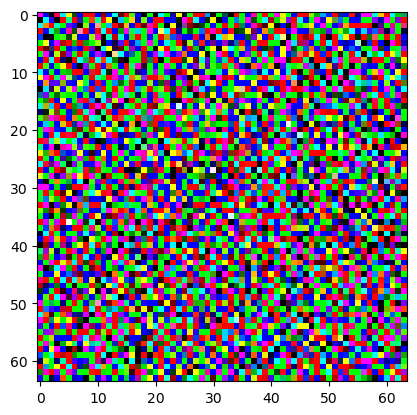

16519.227


In [17]:
image1 = a[0].cpu().detach().numpy().transpose(1,2,0)
plt.imshow(image1)
plt.show()
print(np.abs(image1).sum())

In [21]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

data = b.cpu().detach().numpy()
data.resize(n, b.shape[1]*b.shape[2]*b.shape[3])
print('X has shape: ', data.shape)


scaler = StandardScaler()
X_standardized = scaler.fit_transform(data)
pca = PCA(n_components=50)
pca.fit(X_standardized)
print(pca.explained_variance_ratio_)

X has shape:  (50, 8192)
[3.12900804e-02 2.83035189e-02 2.74542682e-02 2.68973187e-02
 2.63569448e-02 2.59582978e-02 2.55368631e-02 2.54103038e-02
 2.47892365e-02 2.42952779e-02 2.41340622e-02 2.34989971e-02
 2.30183639e-02 2.28886139e-02 2.25833450e-02 2.22768802e-02
 2.21519228e-02 2.18102410e-02 2.15269197e-02 2.14862321e-02
 2.10637916e-02 2.07798891e-02 2.04376113e-02 2.01401487e-02
 1.98874213e-02 1.97400749e-02 1.96487475e-02 1.93050206e-02
 1.90514401e-02 1.89021844e-02 1.86467320e-02 1.84368026e-02
 1.82707980e-02 1.80139281e-02 1.76859181e-02 1.75059754e-02
 1.73412245e-02 1.69795789e-02 1.67571269e-02 1.61925368e-02
 1.60166081e-02 1.58253741e-02 1.55179407e-02 1.50245540e-02
 1.49252312e-02 1.44315036e-02 1.41472956e-02 1.40343085e-02
 1.36225559e-02 2.06652513e-15]


In [22]:
pca.singular_values_

array([1.13209618e+02, 1.07671356e+02, 1.06043709e+02, 1.04962570e+02,
       1.03902863e+02, 1.03114105e+02, 1.02273651e+02, 1.02019905e+02,
       1.00765427e+02, 9.97564316e+01, 9.94249039e+01, 9.81080475e+01,
       9.70995483e+01, 9.68254929e+01, 9.61776352e+01, 9.55228271e+01,
       9.52545395e+01, 9.45170593e+01, 9.39011536e+01, 9.38123703e+01,
       9.28855667e+01, 9.22574768e+01, 9.14945145e+01, 9.08262329e+01,
       9.02545700e+01, 8.99196014e+01, 8.97113495e+01, 8.89232025e+01,
       8.83372498e+01, 8.79905396e+01, 8.73939438e+01, 8.69006042e+01,
       8.65084915e+01, 8.58982239e+01, 8.51125870e+01, 8.46784973e+01,
       8.42790909e+01, 8.33956604e+01, 8.28475647e+01, 8.14399338e+01,
       8.09963150e+01, 8.05113220e+01, 7.97254562e+01, 7.84477997e+01,
       7.81880722e+01, 7.68839645e+01, 7.61231384e+01, 7.58185501e+01,
       7.46980515e+01, 2.90937915e-05], dtype=float32)

In [23]:
reduced_data = pca.transform(X_standardized)
print(reduced_data.shape)
print(reduced_data[:5, 0])

reduced_data[:, 0] = reduced_data[:, 0] * 1.5
print(reduced_data[:5, 0])


orgi_data = pca.inverse_transform(reduced_data)
print(data[:5, 0])
print(orgi_data.shape)
print(orgi_data[:5, 0])

(50, 50)
[ 20.320322   10.8710985  13.887426    2.4295864 -23.367683 ]
[ 30.480484   16.306648   20.831139    3.6443796 -35.051525 ]
[10.080314  12.1379175  2.6973567  8.501037  -2.4224322]
(50, 8192)
[ 0.76016456  0.9208426   0.01389201  0.5310378  -0.6416114 ]


In [24]:
print(pca.components_.shape)
print(pca.components_[1:5, 0])

(50, 8192)
[-0.00142525 -0.00986949 -0.00442264  0.02126119]


In [47]:
a = np.array([[1, 2, 3], [4, 5, 6], [7, 8, 9]])
a[:3, 0]

array([1, 4, 7])